<a href="https://colab.research.google.com/github/aiyuyun2015/BookCode/blob/master/Copy_of_Cascade_TabNet_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CascadeTabNet Demo Notebook
[![PWC](https://img.shields.io/endpoint.svg?url=https://paperswithcode.com/badge/cascadetabnet-an-approach-for-end-to-end/table-detection-on-icdar2013-1)](https://paperswithcode.com/sota/table-detection-on-icdar2013-1?p=cascadetabnet-an-approach-for-end-to-end)
[![PWC](https://img.shields.io/badge/PyTorch-v1.4-blue)](https://pytorch.org/)
[![PWC](https://img.shields.io/badge/%20mmdetection%20-v1.2-blue)](https://github.com/open-mmlab/mmdetection)

> **CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents**<br>
> [Devashish Prasad](https://github.com/DevashishPrasad),
> [Ayan Gadpal](https://github.com/ayangadpal),
> [Kshitij Kapadni](https://github.com/kshitijkapadni),
> [Manish Visave](https://github.com/ManishDV),
> <br>
> [Preprint Link of Paper](https://arxiv.org/abs/2004.12629)<br>
> <a href="results.pdf">Supplementary file</a> <br>
> The paper has been accepted at [CVPR 2020 Workshop on Text and Documents in the Deep Learning Era](https://cvpr2020text.wordpress.com/)<br>
> [Code Link](https://github.com/DevashishPrasad/CascadeTabNet)
<img align="right" src="imgs/CVPR Teaser.gif" />

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [ ]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"

## 2. Clone the Repository 
We will be using "ICDAR 19 (Track B2 Modern) table structure recognition" for demo

In [1]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

Cloning into 'CascadeTabNet'...
remote: Enumerating objects: 656, done.
remote: Total 656 (delta 0), reused 0 (delta 0), pack-reused 656
Receiving objects: 100% (656/656), 16.55 MiB | 18.85 MiB/s, done.
Resolving deltas: 100% (317/317), done.


## 3. Download the Pretrained Model



In [2]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
664MB [00:04, 164MB/s]


## 4. Run the Predictions

In [2]:
import sys
sys.path.insert(0,'CascadeTabNet/Table Structure Recognition')

In [3]:
from border import border
from mmdet.apis import inference_detector, show_result, init_detector
import cv2
from Functions.blessFunc import borderless
import lxml.etree as etree
import glob

In [4]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [9]:
image_path = 'images/*.png'
xmlPath = 'output'
imgs = glob.glob(image_path)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


LLL
[Table status] : Processing table with lines


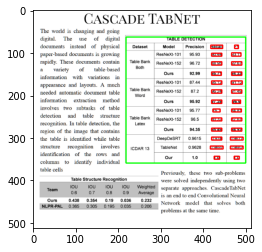

[array([ 88, 392, 218, 401,  87])]
[array([ 33, 417,  57, 425,  98]), array([ 88, 423, 103, 432,  99]), array([129, 410, 145, 432,  91]), array([171, 422, 185, 432,  94]), array([210, 424, 224, 431,  99])]
[array([ 19, 455,  68, 464,  99]), array([ 33, 442,  55, 450,  98]), array([ 83, 442, 107, 450,  99]), array([124, 456, 150, 464,  99]), array([125, 442, 150, 450,  99]), array([168, 442, 187, 450,  99]), array([204, 456, 229, 464,  99]), array([205, 442, 229, 450,  99])]
[]
[[19, 68], [33, 55], [83, 107], [124, 150], [125, 150], [168, 187], [204, 229], [205, 229]]
[[19, 68], [33, 55], [83, 107], [124, 150], [125, 150], [168, 187], [204, 229], [205, 229]]
table: [  4 381 304 481]
[Table status] : Processing table with lines


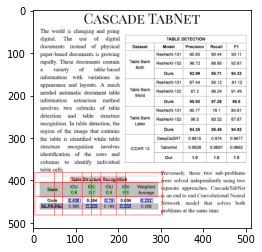

LLL
[Table status] : Processing table with lines


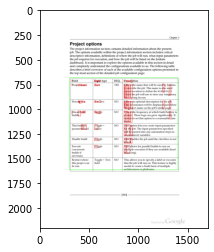

In [10]:
for i in imgs:
    result = inference_detector(model, i)
    res_border = []
    res_bless = []
    res_cell = []
    root = etree.Element("document")
    ## for border
    for r in result[0][0]:
        if r[4]>.85:
            res_border.append(r[:4].astype(int))
    ## for cells
    for r in result[0][1]:
        if r[4]>.85:
            r[4] = r[4]*100
            res_cell.append(r.astype(int))
    ## for borderless
    for r in result[0][2]:
        if r[4]>.85:
            res_bless.append(r[:4].astype(int))

    ## if border tables detected 
    if len(res_border) != 0:
        ## call border script for each table in image
        for res in res_border:
            try:
                root.append(border(res,cv2.imread(i)))  
            except:
                pass
    if len(res_bless) != 0:
        if len(res_cell) != 0:
            for no,res in enumerate(res_bless):
                root.append(borderless(res,cv2.imread(i),res_cell))

    myfile = open(xmlPath+i.split('/')[-1][:-3]+'xml', "w")
    myfile.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    myfile.write(etree.tostring(root, pretty_print=True,encoding="unicode"))
    myfile.close()

**Note :** If you are getting "no module name mmdet" error, Please Restart the runtime by pressing "Crtl+M" OR going to the runtime (5th option, top left) and selecting Restart Runtime.

After this, use TSR postprocessing for best result

# Cite us
If you find this work useful for your research, please cite our paper:

```
@misc{ cascadetabnet2020,
    title={CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents},
    author={Devashish Prasad and Ayan Gadpal and Kshitij Kapadni and Manish Visave and Kavita Sultanpure},
    year={2020},
    eprint={2004.12629},
    archivePrefix={arXiv},
    primaryClass={cs.CV}
}
```
